# Nonlinear Regression Predictor – Ice Cream Sales

### Project Description:
This project explores nonlinear regression techniques to model the relationship between temperature and ice cream sales using a simple dataset from Kaggle. It begins with polynomial regression to capture the quadratic relationship and progresses to more advanced techniques, including learning both weights and exponents (learnable feature transformations). The project also implements k-fold cross-validation to evaluate model generalization and prevent overfitting.

### Objectives:
* Load and explore a real-world ice cream selling dataset from Kaggle
* Visualize the relationship between temperature and sales to motivate the use of polynomial regression
* Implement polynomial regression from scratch, including design matrix construction and gradient descent optimization
* Extend the approach to support learnable exponents for flexible feature transformation
* Evaluate model performance using mean squared error (MSE) and visualize the fitted regression curve

### Public dataset source:
[Kaggle Ice Cream Selling Data Set](https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression)
The data contains information on the temperature and the corresponding number of units of ice cream sold

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import r2_score

In [ ]:
# Establish file path and import data
path = 'ice_cream_sales.csv'
df = pd.read_csv(path)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


Text(0, 0.5, 'Ice Cream Sales (units)')

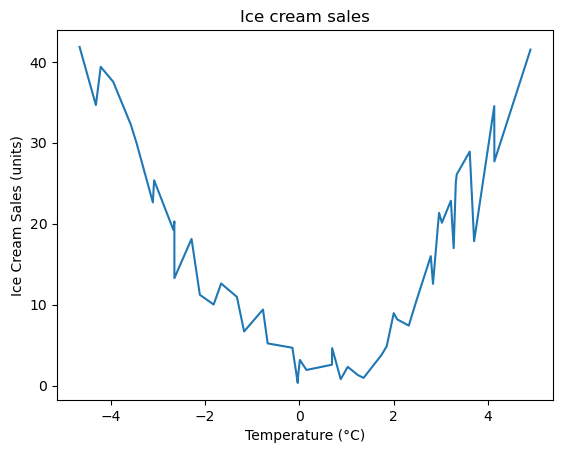

In [ ]:
plt.plot(df['Temperature (°C)'],df['Ice Cream Sales (units)'])
plt.title('Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sold (units)')

In [5]:
# Relationship looks quadratic, so a polynomial degree of 2
X = df['Temperature (°C)'] # Input
y = df['Ice Cream Sales (units)'] # Target

In [40]:
# Define function to construct b matrix from transforming X in higher dimensions
def b(X, p):
    n = len(X)
    # b = np.zeros((n, p + 1)) # Initialize b matrix
    for j in range(n): # Index over rows (samples)
        for i in range(p): # Index over columns (degree)
            b[j,i] = X[j]**i # Generate a row of features for each sample
    return b

In [21]:
def nonlinear_model(X,y,W,b, alpha = 0.001, n_iterations=1000):
    N = len(X)
    loss_history = [] # Initialize loss history
    for i in range(n_iterations):
        # y_hat = np.dot(b.T, W)
        y_hat = b @ W # Prediction equation
        resid = y_hat - y # Error
        grad = (2/N) * (b.T @ resid) # Gradient descent
        W -= alpha * grad # Update weights
        mse = np.mean(resid ** 2) # Calculate loss
        loss_history.append(mse)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {mse:.4f}")
    return W, loss_history

In [ ]:
# Choose zeroes as W
degree = 3
W = np.zeros(degree + 1)
B = b(X,degree)
W, loss_history = nonlinear_model(X,y,W,B)

Iteration 0: Loss = 400.3314
Iteration 100: Loss = 13.1364
Iteration 200: Loss = 12.4252
Iteration 300: Loss = 12.0310
Iteration 400: Loss = 11.7105
Iteration 500: Loss = 11.4411
Iteration 600: Loss = 11.2143
Iteration 700: Loss = 11.0233
Iteration 800: Loss = 10.8624
Iteration 900: Loss = 10.7268


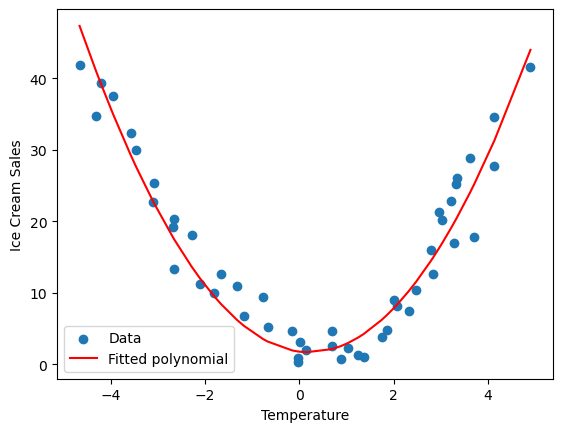

In [28]:
# Graph prediction
X_sorted = np.sort(X) # Put the x values in order
B_sorted = b(X_sorted, degree) # Build polynomial features for sorted points
y_pred = B_sorted @ W # Compute predictions for the line, based on model's parameters


plt.scatter(X, y, label="Data")  # Original scatterplot
plt.plot(X_sorted, y_pred, color="red", label="Fitted polynomial")  # Fitted curve
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")
plt.legend()
plt.show()


In [ ]:
# Try with random W initialization
W = np.random.randn(degree + 1) * 0.01 # Small normally distributed random numbers
W, loss_history = nonlinear_model(X,y,W,B)

# Similar loss as initializing with zeroes

Iteration 0: Loss = 399.5587
Iteration 100: Loss = 13.1402
Iteration 200: Loss = 12.4310
Iteration 300: Loss = 12.0360
Iteration 400: Loss = 11.7147
Iteration 500: Loss = 11.4447
Iteration 600: Loss = 11.2173
Iteration 700: Loss = 11.0258
Iteration 800: Loss = 10.8645
Iteration 900: Loss = 10.7286


## Learnable Feature Transformations

In the case of classic polynomial regression, the degree is fixed and exponents are known. Only w parameters are learned.  
For a learnable-exponent model, on the other hand, while the degree (or number of terms) is still fixed, the exponents (v1, v2, v3, etc.) are learned. This means that v can be fractional, non-integer, negative, etc.

In [ ]:
def b(X, v):
    n = len(X) # Number of samples
    p = len(v) # Degree of polynomial
    b = np.zeros((n, p + 1)) # Initialize b matrix
    b[:, 0] = 1  # Constant term (bias w0)
    for i in range(p):
        b[:, i+1] = X ** v[i]
    return b

def model_features(X,y,theta,b, alpha = 0.001, n_iterations=1000):
    N = len(X)
    p = (len(theta) - 1) // 2
    loss_history = [] # Initialize loss history

    for i in range(n_iterations):
        # Separate w and v from theta vector
        w = theta[:p+1]   # First p+1 params are w_i
        v = theta[p+1:]   # Remaining p params are v_i

        # Build b matrix dynamically based on current v
        b = np.zeros((N, p+1))
        b[:, 0] = 1
        for j in range(p):
            b[:, j+1] = X ** v[j]

        y_hat = b @ W # Prediction equation
        resid = y_hat - y # Error

        # Gradient descent
        grad_w = (2/N) * (b.T @ resid)
        grad_v = np.zeros(p) # Gradient w.r.t v
        for j in range(p):
            term = (X ** v[j]) * np.log(X)
            grad_v[j] = (2/N) * np.sum(resid * w[j+1] * term)

        # Combine gradients into one theta gradient
        grad = np.concatenate([grad_w, grad_v])

        mse = np.mean(resid ** 2) # Calculate loss
        loss_history.append(mse)
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {mse:.4f}")
    return theta, loss_history

In [ ]:
p = 3  # Allow up to cubic powers
w_init = np.zeros(p+1)  # Start weights at 0 or small random values
v_init = np.arange(1, p+1)  # Initialize exponents to 1, 2, 3

theta_init = np.concatenate([w_init, v_init])
B = b(X,v_init)
theta_trained, loss_history = model_features(X, y, theta_init, B)

# This approach resulted in a slightly better peformance according to the loss function

Iteration 0: Loss = 10.6127
Iteration 100: Loss = 10.6127
Iteration 200: Loss = 10.6127
Iteration 300: Loss = 10.6127
Iteration 400: Loss = 10.6127
Iteration 500: Loss = 10.6127
Iteration 600: Loss = 10.6127
Iteration 700: Loss = 10.6127
Iteration 800: Loss = 10.6127
Iteration 900: Loss = 10.6127
